# League of Legends Game Matching Analysis (Korea Server 2020)

Description: TODO

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pickle # data processing, pickle file I/O
import json # data processing, json file I/O
import random # data quality testing
import sqlalchemy # copy pd dataframe to sql 
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy.types import * 

## A. Extract and Transform the Data
Description TODO

In [4]:
match_df = pd.read_pickle('./archive/match_data_version1.pickle')

##### Match Data Explaination
The `match_df` contains 108,829 rows and 14 columns. Each row represents a single match on Korea server in 2020. Each column is a property of the match and is described as follows:
1. `gameCreation`: The time stamp of the creation of this match
2. `gameDuration`: The duration of this match
3. `gameId`: The unique game id of this match
4. `gameMode`: The game mode of this match which has 8 options: `CLASSIC`, `ARAM`, `ONEFORALL`, `URF`, `TUTORIAL_MODULE_3`,
       `TUTORIAL_MODULE_1`, `KINGPORO`, `TUTORIAL_MODULE_2`. Each option changes the policy of the game and may affect the analysis.
5. `gameType`: This version has only matched games.
6. `gameVersion`: The version of this game
7. `mapId`: The id of the map that this match begins with
8. `participantIdentities`: The account information of participants (usually 10 participants) in this game
9. ``

In [5]:
match_df.shape

(108829, 14)

In [6]:
match_df.head()

,gameCreation,gameDuration,gameId,gameMode,gameType,gameVersion,mapId,participantIdentities,participants,platformId,queueId,seasonId,status.message,status.status_code
0,1.585155e+12,1323.0,4.247263e+09,CLASSIC,MATCHED_GAME,10.6.314.4405,11.0,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420.0,13.0,NaN,NaN
1,1.585152e+12,1317.0,4.247156e+09,CLASSIC,MATCHED_GAME,10.6.314.4405,11.0,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420.0,13.0,NaN,NaN
2,1.585059e+12,932.0,4.243963e+09,CLASSIC,MATCHED_GAME,10.6.313.8894,11.0,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420.0,13.0,NaN,NaN
3,1.584978e+12,2098.0,4.241678e+09,CLASSIC,MATCHED_GAME,10.6.313.8894,11.0,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420.0,13.0,NaN,NaN
4,1.584973e+12,2344.0,4.241539e+09,CLASSIC,MATCHED_GAME,10.6.313.8894,11.0,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420.0,13.0,NaN,NaN


In [7]:
match_df['gameMode'].unique()

array(['CLASSIC', 'ARAM', 'ONEFORALL', 'URF', 'TUTORIAL_MODULE_3',
       'TUTORIAL_MODULE_1', 'KINGPORO', 'TUTORIAL_MODULE_2'], dtype=object)

In [8]:
match_df['gameType'].unique()

array(['MATCHED_GAME'], dtype=object)

In [9]:
match_df.reset_index()

,index,gameCreation,gameDuration,gameId,gameMode,gameType,gameVersion,mapId,participantIdentities,participants,platformId,queueId,seasonId,status.message,status.status_code
0,0,1.585155e+12,1323.0,4.247263e+09,CLASSIC,MATCHED_GAME,10.6.314.4405,11.0,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420.0,13.0,NaN,NaN
1,1,1.585152e+12,1317.0,4.247156e+09,CLASSIC,MATCHED_GAME,10.6.314.4405,11.0,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420.0,13.0,NaN,NaN
2,2,1.585059e+12,932.0,4.243963e+09,CLASSIC,MATCHED_GAME,10.6.313.8894,11.0,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420.0,13.0,NaN,NaN
3,3,1.584978e+12,2098.0,4.241678e+09,CLASSIC,MATCHED_GAME,10.6.313.8894,11.0,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420.0,13.0,NaN,NaN
4,4,1.584973e+12,2344.0,4.241539e+09,CLASSIC,MATCHED_GAME,10.6.313.8894,11.0,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420.0,13.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108824,0,1.579163e+12,1029.0,4.088497e+09,URF,MATCHED_GAME,10.1.303.9385,11.0,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,900.0,13.0,NaN,NaN
108825,0,1.580823e+12,1544.0,4.130964e+09,CLASSIC,MATCHED_GAME,10.2.305.4739,11.0,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420.0,13.0,NaN,NaN
108826,0,1.580382e+12,2090.0,4.119954e+09,CLASSIC,MATCHED_GAME,10.2.305.4739,11.0,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420.0,13.0,NaN,NaN
108827,0,1.580805e+12,1382.0,4.130440e+09,URF,MATCHED_GAME,10.2.305.4739,11.0,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,900.0,13.0,NaN,NaN


In [23]:
classic_df = match_df[match_df["gameMode"] == "CLASSIC"].reset_index()
game_column_list = ["gameId", "gameVersion", "gameDuration"]
participant_column_list = ["participantId", "teamId", "championId"]
participant_stat_list = ["win", "visionScore", "kills", "deaths", "assists", "totalDamageDealtToChampions",
                               "totalHeal", "totalDamageTaken", "timeCCingOthers"]
participant_timeline_list = ["lane"]

In [11]:
classic_df.shape

(92857, 15)

### 1. Extract the required fields from JSON arrays
Each match contains a JSON array of each player. The extraction of the required fileds from these JSON arrays can ease the analysis.

In [25]:
num_players_ingame = 10
untidy_game_id = []
player_game_list = []
for index in range(0, len(classic_df)):
    if index % 1000 == 0:
        print(str(index)+" "+str(len(player_game_list)))
    current_line = classic_df.iloc[index]
    team_value = []
    for column in game_column_list:
        team_value.append(current_line[column])
    for player_index in range(0, num_players_ingame):
        try:
            current_player = current_line["participants"][player_index]
            player_value = []
            for column in participant_column_list:
                player_value.append(current_player[column])
            current_player_stat = current_player["stats"]
            for column in participant_stat_list:
                player_value.append(current_player_stat[column])
            current_player_timeline = current_player["timeline"]
            for column in participant_timeline_list:
                player_value.append(current_player_timeline[column])
                
            player_game_list.append(team_value+player_value)
        except:
            print("cur_game_index: "+str(index)+" cur_player_index: " + str(player_index))
            untidy_game_id.append(classic_df.loc[index]["gameId"])

untidy_rows = list(set(untidy_game_id)) 
player_game_df = pd.DataFrame(player_game_list,
                              columns = game_column_list+participant_column_list+participant_stat_list+participant_timeline_list)
player_game_df = player_game_df[~player_game_df["gameId"].isin(untidy_rows)]
player_game_df.head()

0 0
1000 10000
2000 20000
3000 30000
4000 40000
5000 50000
6000 60000
7000 70000
8000 80000
9000 90000
10000 100000
11000 110000
12000 120000
13000 130000
14000 140000
15000 150000
16000 160000
17000 170000
18000 180000
19000 190000
20000 200000
21000 210000
22000 220000
23000 230000
24000 240000
25000 250000
26000 260000
27000 270000
28000 280000
29000 290000
30000 300000
31000 310000
32000 320000
33000 330000
34000 340000
35000 350000
36000 360000
37000 370000
38000 380000
39000 390000
40000 400000
41000 410000
42000 420000
43000 430000
44000 440000
45000 450000
46000 460000
47000 470000
48000 480000
49000 490000
50000 500000
51000 510000
52000 520000
53000 530000
54000 540000
55000 550000
56000 560000
57000 570000
58000 580000
59000 590000
60000 600000
61000 610000
62000 620000
63000 630000
cur_game_index: 63635 cur_player_index: 6
cur_game_index: 63635 cur_player_index: 7
cur_game_index: 63635 cur_player_index: 8
cur_game_index: 63635 cur_player_index: 9
64000 639996
65000 649996
6

,gameId,gameVersion,gameDuration,participantId,teamId,championId,win,visionScore,kills,deaths,assists,totalDamageDealtToChampions,totalHeal,totalDamageTaken,timeCCingOthers,lane
0,4.247263e+09,10.6.314.4405,1323.0,1,100,7,False,14,3,6,3,10844,4006,17255,12,MIDDLE
1,4.247263e+09,10.6.314.4405,1323.0,2,100,350,False,34,0,6,10,7095,11758,9994,8,MIDDLE
2,4.247263e+09,10.6.314.4405,1323.0,3,100,266,False,8,4,5,2,13458,5215,23283,19,TOP
3,4.247263e+09,10.6.314.4405,1323.0,4,100,517,False,21,4,7,4,9670,10056,25363,10,JUNGLE
4,4.247263e+09,10.6.314.4405,1323.0,5,100,110,False,14,4,7,3,14972,0,16243,20,BOTTOM


In [26]:
# After cleaned
player_game_df.shape

(928510, 16)

In [27]:
player_game_df.reset_index(drop=True, inplace=True)

In [28]:
player_game_df.to_csv("./archive/player_game.csv", index=False)

### 2. Loading champion, item, and win/lose data

In [12]:
winner_df =  pd.read_pickle('./archive/match_winner_data_version1.pickle')
loser_df = pd.read_pickle('./archive/match_loser_data_version1.pickle')
champion_df = pd.read_csv('./archive/riot_champion.csv')
item_df = pd.read_csv('./archive/riot_item.csv')

Since we have already extracted and saved the data of each player in the match in `match_df`, we can directly load the data from saved CSV file to save time when reload this notebook.

In [13]:
player_game_df = pd.read_csv('./archive/player_game.csv')

Let's check the sanity again.

In [14]:
player_game_df.shape

(928510, 16)

### 3. Clean and filter the data

#### a. Filter the team data
We want only the ranking data as the non-ranking matches are more casual and cannot reflect the statistics that we pursue

In [15]:
num_non_rank_winner = 0
non_rank_winner = []
original_winner_len = len(winner_df)
original_loser_len = len(loser_df)
for i in range(len(winner_df)):
    if len(winner_df.loc[i]["bans"]) == 0:
        num_non_rank_winner += 1
        non_rank_winner.append(i)
num_non_rank_loser = 0
non_rank_loser = []
for i in range(len(loser_df)):
    if len(loser_df.loc[i]["bans"]) == 0:
        num_non_rank_loser += 1
        non_rank_loser.append(i)
print("the non_rank number in winner is: " + str(num_non_rank_winner) + ", the rank rate is: " + str(1-num_non_rank_winner/len(winner_df)))
print("the non_rank number in loser is: " + str(num_non_rank_loser) + ", the rank rate is: " + str(1-num_non_rank_loser/len(loser_df)))
print("the original length of winner_df is: " + str(original_winner_len))
print("the original length of loser_df is: " + str(original_loser_len))
print("the match number in winner and loser is equal: "+ str(len(winner_df) == len(loser_df)))
print("the non_rank row number in winner and loser is equal: "+ str(non_rank_winner==non_rank_loser))

the non_rank number in winner is: 24632, the rank rate is: 0.7736632699004861
the non_rank number in loser is: 24632, the rank rate is: 0.7736632699004861
the original length of winner_df is: 108829
the original length of loser_df is: 108829
the match number in winner and loser is equal: True
the non_rank row number in winner and loser is equal: True


As we can see in the data, almost 80% of the matches are ranking. The way I check if it ranking is checking whether the `bans` is empty. In League of Legends, the `bans` functionality is only enabled in rank mode. Also, the number and non_rank row number of matches are identical for both winner and loser data frame which means at least the number of teams matches.
Then, let's cast these non_rank matches out

In [16]:
winner_df = winner_df.drop(non_rank_winner)
loser_df = loser_df.drop(non_rank_loser)

In [17]:
print(winner_df.isna().sum())
print(len(winner_df))
print("the length after cleaning is consistent with the counting before: " + str(len(winner_df) == original_winner_len - num_non_rank_winner))

teamId                  0
win                     0
firstBlood              0
firstTower              0
firstInhibitor          0
firstBaron              0
firstDragon             0
firstRiftHerald         0
towerKills              0
inhibitorKills          0
baronKills              0
dragonKills             0
vilemawKills            0
riftHeraldKills         0
dominionVictoryScore    0
bans                    0
gameId                  0
dtype: int64
84197
the length after cleaning is consistent with the counting before: True


In [18]:
print(loser_df.isna().sum())
print(len(loser_df))
print("the length after cleaning is consistent with the counting before: " + str(len(loser_df) == original_loser_len - num_non_rank_loser))

teamId                  0
win                     0
firstBlood              0
firstTower              0
firstInhibitor          0
firstBaron              0
firstDragon             0
firstRiftHerald         0
towerKills              0
inhibitorKills          0
baronKills              0
dragonKills             0
vilemawKills            0
riftHeraldKills         0
dominionVictoryScore    0
bans                    0
gameId                  0
dtype: int64
84197
the length after cleaning is consistent with the counting before: True


After the cleaning, both data frames have no NA values. Now, let's union winners and losers together.

In [19]:
#team_game_df = df.concat([winner_df, loser_df])
#team_game_df["bans1"] = ""
team_df = pd.concat([winner_df, loser_df])
team_df = team_df.reset_index()

In [20]:
len(team_df)

168394

Now, we want to exclude the non classic games in `team_df` as well.

In [21]:
unique_classic_game_number = player_game_df["gameId"].unique()

In [22]:
len(unique_classic_game_number)

92815

The number of unique gameId is correct because it is 1/10 of player_game_df length.
After we extract the unique game ID from `player_game_df` which contains only classic game, we can then apply it as a filter to `team_df`.

In [23]:
team_df = team_df[team_df["gameId"].isin(unique_classic_game_number)]

In [24]:
team_df.reset_index(drop=True, inplace=True)

In [25]:
len(team_df)

165032

The number is correct.

#### b. Filter the player data
Then, we can extract the unique `gameId` in `team_df` to filter the rank matches in `player_game_df`.

In [26]:
unique_classic_rank_gameId = team_df["gameId"].unique()

In [27]:
player_game_df = player_game_df[player_game_df["gameId"].isin(unique_classic_rank_gameId)]

In [28]:
len(team_df)

165032

In [29]:
len(player_game_df)

825160

#### c. Clean the team data: extraction and spreading
It is a good practice to take a look at the data format of `bans` in `team_df` first.

In [30]:
team_df["bans"].iloc[0]

[{'championId': 523, 'pickTurn': 6},
 {'championId': 429, 'pickTurn': 7},
 {'championId': 142, 'pickTurn': 8},
 {'championId': 62, 'pickTurn': 9},
 {'championId': -1, 'pickTurn': 10}]

It contains five banned champions for each team in a list. We can see there is a `-1` in the data indicating the last ban slot is unused, i.e, the team didn't select a champion for the fifth slot. As a reminder, there is a need to add one row containing `-1` as champion id to make up a placeholder in champion data frame.

In [31]:
ban_lst = [[],[],[],[],[]]
for team_no in range(len(team_df)):
    for ban_no in range(0, 5):
        data = team_df.loc[team_no]["bans"][ban_no]["championId"]
        ban_lst[ban_no].append(data)

In [32]:
for i in range(len(ban_lst)):
    team_df["bans"+str(i+1)] = ban_lst[i]

The `team_df` now contains widely-spread ban list. Here is a quick look at the new `team_df`.

In [33]:
team_df.drop(columns = ["bans"], inplace = True)
team_df.head()

,index,teamId,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKills,...,dragonKills,vilemawKills,riftHeraldKills,dominionVictoryScore,gameId,bans1,bans2,bans3,bans4,bans5
0,0,200,Win,False,True,True,False,True,True,9,...,3,0,2,0,4.247263e+09,523,429,142,62,-1
1,1,100,Win,False,False,False,False,True,True,4,...,2,0,2,0,4.247156e+09,523,429,60,2,53
2,2,200,Win,True,True,True,False,True,True,5,...,2,0,2,0,4.243963e+09,350,4,105,875,80
3,3,200,Win,True,True,False,False,False,True,6,...,3,0,1,0,4.241678e+09,81,110,523,429,60
4,4,100,Win,True,True,True,True,True,True,11,...,2,0,2,0,4.241539e+09,30,429,523,235,7


#### d. Clean the duplicate data in both players and teams
Duplicate data will have a negative effect on our analysis. Therefore, we want to remove the duplicate data if any. The keys of `team_df` are `gameId` and `teamId`. The keys of `player_game_df` are `gameId` and `participantId`.
1. `team_df`: Each game has exactly two teams and the two teams cannot have the same teamId in the same game/match.
2. `player_game_df`: Each game has exactly ten players assigned to `participantId` from 0 to 9 without duplications.

In [34]:
team_df.drop_duplicates(["gameId", "teamId"], inplace=True)
player_game_df.drop_duplicates(["gameId", "participantId"], inplace=True)

Then, let's check if each game has exactly two teams and ten players.

In [35]:
len(team_df.groupby("gameId")["gameId"].filter(lambda x: len(x) != 2))

0

In [36]:
len(player_game_df.groupby("gameId")["gameId"].filter(lambda x: len(x) != 10))

0

Add patch version for later uses.

In [43]:
patch_version = []
player_game_df = player_game_df.reset_index(drop=True)
for i in range(len(player_game_df)):
    cur_game_version = player_game_df.loc[i, 'gameVersion']
    cur_patch_version = ".".join(cur_game_version.split('.')[0:2])
    patch_version.append(cur_patch_version)
player_game_df['patch_version'] = patch_version
player_game_df

,gameId,gameVersion,gameDuration,participantId,teamId,championId,win,visionScore,kills,deaths,assists,totalDamageDealtToChampions,totalHeal,totalDamageTaken,timeCCingOthers,lane,patch_version
0,4.247263e+09,10.6.314.4405,1323.0,1,100,7,False,14,3,6,3,10844,4006,17255,12,MIDDLE,10.6
1,4.247263e+09,10.6.314.4405,1323.0,2,100,350,False,34,0,6,10,7095,11758,9994,8,MIDDLE,10.6
2,4.247263e+09,10.6.314.4405,1323.0,3,100,266,False,8,4,5,2,13458,5215,23283,19,TOP,10.6
3,4.247263e+09,10.6.314.4405,1323.0,4,100,517,False,21,4,7,4,9670,10056,25363,10,JUNGLE,10.6
4,4.247263e+09,10.6.314.4405,1323.0,5,100,110,False,14,4,7,3,14972,0,16243,20,BOTTOM,10.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824895,4.119954e+09,10.2.305.4739,2090.0,6,200,432,False,91,2,8,19,16878,10313,24864,30,BOTTOM,10.2
824896,4.119954e+09,10.2.305.4739,2090.0,7,200,39,False,20,4,4,7,10612,6224,24213,10,TOP,10.2
824897,4.119954e+09,10.2.305.4739,2090.0,8,200,68,False,29,8,5,14,29630,3730,22100,17,MIDDLE,10.2
824898,4.119954e+09,10.2.305.4739,2090.0,9,200,429,False,39,7,5,12,22332,6083,24428,21,BOTTOM,10.2


#### e. Save the cleaned data
After cleaning, it is better to save the cleaned data frame into CSV for the analysis or data manipulation in later sections.

In [44]:
team_df.to_csv("./archive/classicRank_team.csv", index = False)
player_game_df.to_csv("./archive/classicRank_player.csv", index = False)

In [45]:
print("the saved classicRank_team.csv has a length of " + str(len(team_df)))
print("the saved classicRank_player.csv has a length of " + str(len(player_game_df)))
print("Is the player number five times of the team number? " + str(len(player_game_df)/len(team_df) == 5))

the saved classicRank_team.csv has a length of 164980
the saved classicRank_player.csv has a length of 824900
Is the player number five times of the team number? True


Each team in a classic rank game has exactly five players. The length of players data is five times of the length of teams data which reveals the cleaning is correct and sufficient for filtering classic rank games.

### 4. Save the required data frame to MySQL
When dealing with large dataset, using SQL is more efficient and faster for data processing and data manipulation.

In [46]:
DATABASE_HOST = "127.0.0.1"
DATABASE_NAME = "League_of_Legends"
DATABASE_USERNAME = "root" 
DATABASE_PASSWORD = "zzh110159"

sql_engine = sqlalchemy.create_engine('mysql+pymysql://'+
                                      DATABASE_USERNAME+':'+DATABASE_PASSWORD+'@'+DATABASE_HOST+'/'+DATABASE_NAME)

In [47]:
player_game_df.to_sql(name="classic_rank_players", con=sql_engine, if_exists='replace', index=False)

824900

In [48]:
team_df.to_sql(name="classic_rank_teams", con=sql_engine, if_exists = "replace", index = False)

164980

In [49]:
champion_df.to_sql(name="champion", con=sql_engine, if_exists = "replace", index = False)

148

In [50]:
item_df.to_sql(name="item", con=sql_engine, if_exists = "replace", index = False)

243

### 5. Load the required data frame from MySQL
There is no need to run the entire notebook from the beginning after restarting. We can simply load the cleaned data from MySQL. In this project, the data we use are team data and player data. We will extract them using sql query in the following session.

In [2]:
DATABASE_HOST = "127.0.0.1"
DATABASE_NAME = "League_of_Legends"
DATABASE_USERNAME = "root" 
DATABASE_PASSWORD = "zzh110159"

sql_engine = sqlalchemy.create_engine('mysql+pymysql://'+
                                      DATABASE_USERNAME+':'+DATABASE_PASSWORD+'@'+DATABASE_HOST+'/'+DATABASE_NAME)

### 6. Hero Win Rate Analysis
I will use the primary tag as the `tags` for analyzing

In [3]:
hero_win_loss_df = pd.read_sql(sql = 'SELECT gameVersion, championId, win, c.name, c.tags FROM classic_rank_players p JOIN champion c ON p.championId = c.key',
                               con = sql_engine)
hero_win_loss_df['tags'] = [tag.split("'")[1] for tag in hero_win_loss_df['tags']] # use primary tag

In [4]:
hero_win_rate = hero_win_loss_df.groupby(['name', 'tags']).apply(lambda x: sum(x['win'])/len(x)).rename('win_rate')
hero_win_rate = hero_win_rate.reset_index()
hero_win_rate.sort_values(by = 'win_rate', ascending = False, inplace = True)
hero_win_rate.reset_index(inplace = True, drop = True)

In [5]:
hero_win_rate

,name,tags,win_rate
0,Bard,Support,0.551180
1,Talon,Assassin,0.545275
2,Karthus,Mage,0.545202
3,Wukong,Fighter,0.536505
4,Janna,Support,0.534147
...,...,...,...
143,Yuumi,Support,0.446694
144,Sejuani,Tank,0.445610
145,Corki,Marksman,0.425837
146,Nasus,Fighter,0.410488


In [6]:
hero_win_top20 = hero_win_rate.loc[0:20]
hero_win_top20

,name,tags,win_rate
0,Bard,Support,0.551180
1,Talon,Assassin,0.545275
2,Karthus,Mage,0.545202
3,Wukong,Fighter,0.536505
4,Janna,Support,0.534147
5,Pantheon,Fighter,0.532963
6,Kassadin,Assassin,0.531200
7,Katarina,Assassin,0.529886
8,Taliyah,Mage,0.529665
9,Elise,Mage,0.529278


In [7]:
hero_loss_top20 = hero_win_rate.loc[len(hero_win_rate)-20:len(hero_win_rate)-1].sort_values(by = 'win_rate', ascending = True).reset_index(drop = True)
hero_loss_top20

,name,tags,win_rate
0,Amumu,Tank,0.395288
1,Nasus,Fighter,0.410488
2,Corki,Marksman,0.425837
3,Sejuani,Tank,0.445610
4,Yuumi,Support,0.446694
5,Nunu & Willump,Tank,0.447167
6,Xerath,Mage,0.447699
7,Dr. Mundo,Fighter,0.450637
8,Lux,Mage,0.452426
9,Irelia,Fighter,0.455765


In [8]:
hue_order = hero_win_loss_df['tags'].unique()

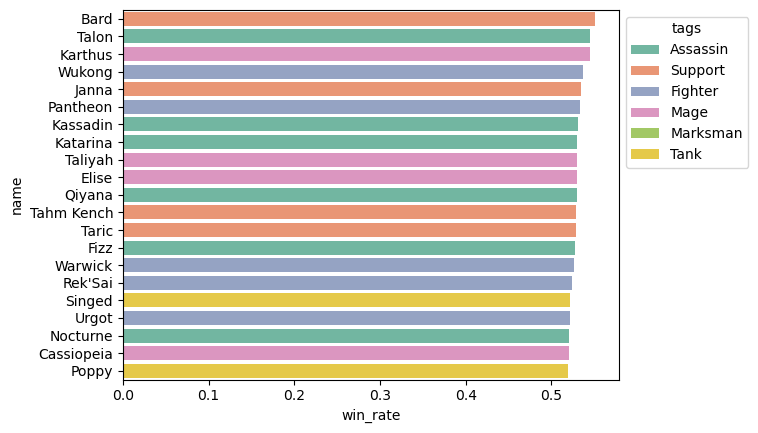

In [21]:
sns.set_palette(sns.color_palette("Set2"))
hero_win_top20_plt = sns.barplot(data = hero_win_top20, x = 'win_rate', y = 'name', orient = 'h', hue = 'tags', hue_order = hue_order, dodge=False)
sns.move_legend(hero_win_top20_plt, "upper left", bbox_to_anchor=(1, 1))

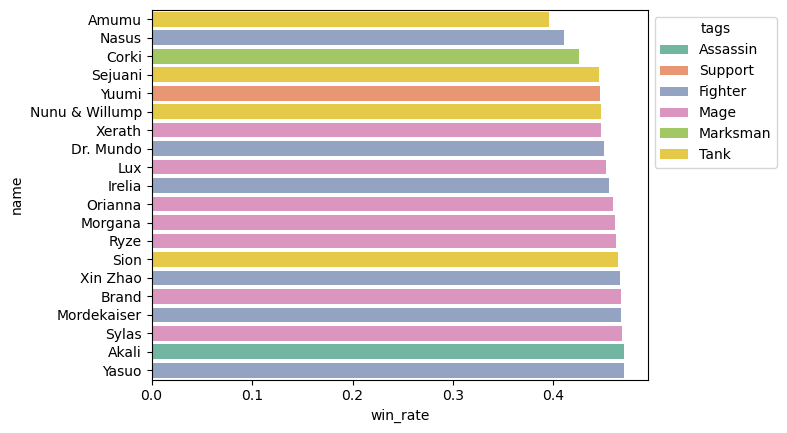

In [14]:
hero_loss_top20_plt = sns.barplot(data = hero_loss_top20, x = 'win_rate', y = 'name', orient = 'h', hue = 'tags', hue_order = hue_order, dodge=False)
sns.move_legend(hero_loss_top20_plt, "upper left", bbox_to_anchor=(1, 1))

#### Hero Popularity Analysis

In [15]:
hero_popularity = hero_win_loss_df.groupby(['name', 'tags']).size().rename('count').reset_index()
hero_popularity

,name,tags,count
0,Aatrox,Fighter,13231
1,Ahri,Mage,2365
2,Akali,Assassin,6369
3,Alistar,Tank,3427
4,Amumu,Tank,382
...,...,...,...
143,Zed,Assassin,3974
144,Ziggs,Mage,1309
145,Zilean,Support,3904
146,Zoe,Mage,11024


In [16]:
hero_popularity_top20 =  hero_popularity.sort_values(by = 'count', ascending = False, ignore_index = True)[0:20]
hero_popularity_top20

,name,tags,count
0,Lee Sin,Fighter,29975
1,Miss Fortune,Marksman,25345
2,Ezreal,Marksman,24771
3,Thresh,Support,21488
4,Lucian,Marksman,20195
5,Sett,Fighter,18326
6,Aphelios,Marksman,17676
7,Ekko,Assassin,17315
8,Kai'Sa,Marksman,17144
9,Elise,Mage,16651


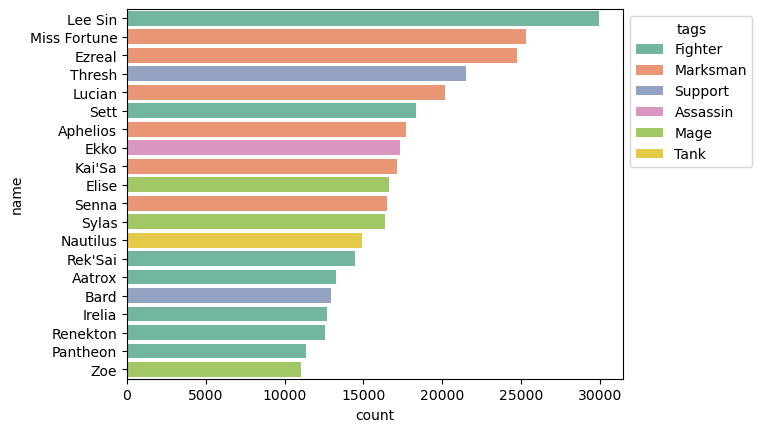

In [17]:
hero_popularity_top20_plt = sns.barplot(data = hero_popularity_top20, y = 'name', x = 'count', hue = 'tags', dodge = False)
sns.move_legend(hero_popularity_top20_plt, "upper left", bbox_to_anchor=(1, 1))

#### Champion pairs analysis

In [42]:
champion_teams_df = pd.read_sql(sql = 'select p1.gameId, p1.teamId, p1.win, p1.championId as champion1, p2.championId as champion2, p3.championId as champion3, p4.championId as champion4, p5.championId as champion5 from classic_rank_players p1 join classic_rank_players p2 on p1.gameId = p2.gameId and p1.teamId = p2.teamId and p2.participantId = p1.participantId + 1 join classic_rank_players p3 on p1.gameId = p3.gameId and p1.teamId = p3.teamId and p3.participantId = p2.participantId + 1 join classic_rank_players p4 on p1.gameId = p4.gameId and p1.teamId = p4.teamId and p4.participantId = p3.participantId + 1 join classic_rank_players p5 on p1.gameId = p5.gameId and p1.teamId = p5.teamId and p5.participantId = p4.participantId + 1 where p1.participantId = 1 or p1.participantId = 6;',
                                con = sql_engine)
champion_pairs_df = pd.read_sql(sql = 'SELECT c1.name AS name0, c2.name AS name1, c1.key AS key0, c2.key AS key1, c1.tags AS tags0, c2.tags AS tags1, 0 AS win, 0 AS total  FROM champion c1 JOIN champion c2 ON c1.key < c2.key ORDER BY c1.key',
                               con = sql_engine)

In [43]:
champion_pairs_df

,name0,name1,key0,key1,tags0,tags1,win,total
0,Annie,Tahm Kench,1,223,['Mage'],"['Support', 'Tank']",0,0
1,Annie,Taliyah,1,163,['Mage'],"['Mage', 'Support']",0,0
2,Annie,Talon,1,91,['Mage'],['Assassin'],0,0
3,Annie,Taric,1,44,['Mage'],"['Support', 'Fighter']",0,0
4,Annie,Teemo,1,17,['Mage'],"['Marksman', 'Assassin']",0,0
...,...,...,...,...,...,...,...,...
10873,Neeko,Sett,518,875,"['Mage', 'Support']","['Fighter', 'Tank']",0,0
10874,Neeko,Aphelios,518,523,"['Mage', 'Support']",['Marksman'],0,0
10875,Aphelios,Pyke,523,555,['Marksman'],"['Support', 'Assassin']",0,0
10876,Aphelios,Sett,523,875,['Marksman'],"['Fighter', 'Tank']",0,0


In [44]:
champion_teams_df

,gameId,teamId,win,champion1,champion2,champion3,champion4,champion5
0,4.247263e+09,100,0,7,350,266,517,110
1,4.247263e+09,200,1,235,81,127,84,421
2,4.247156e+09,100,1,236,245,350,110,57
3,4.247156e+09,200,0,235,126,517,58,15
4,4.243963e+09,100,0,235,60,223,112,58
...,...,...,...,...,...,...,...,...
164975,4.107371e+09,100,1,202,245,134,126,40
164976,4.085875e+09,200,1,163,412,245,236,92
164977,4.074865e+09,200,0,114,34,16,59,51
164978,4.038689e+09,100,0,13,89,76,80,145


In [45]:
champion_teams_df.to_sql(name="teams_champions", con=sql_engine, if_exists = "replace", index = False)
champion_pairs_df.to_sql(name="champion_pairs", con=sql_engine, if_exists = "replace", index = False)

10878

I created a table using 
`select cp.name0, cp.name1, cp.tags0, cp.tags1, tc.win 
from champion_pairs cp  
join teams_champions tc on cp.key0 in (champion1, champion2, champion3, champion4, champion5) and cp.key1 in (champion1, champion2, champion3, champion4, champion5)` to store the pairs_win dataframe in MySQL.

In [114]:
pairs_win_df = pd.read_sql(sql = 'SELECT * FROM pairs_win',
                               con = sql_engine)

In [115]:
pairs_win_df

,name0,name1,tags0,tags1,win
0,LeBlanc,Aatrox,"['Assassin', 'Mage']","['Fighter', 'Tank']",0
1,LeBlanc,Sylas,"['Assassin', 'Mage']","['Mage', 'Assassin']",0
2,LeBlanc,Yuumi,"['Assassin', 'Mage']","['Support', 'Mage']",0
3,LeBlanc,Varus,"['Assassin', 'Mage']","['Marksman', 'Mage']",0
4,Sivir,Jayce,['Marksman'],"['Fighter', 'Marksman']",0
...,...,...,...,...,...
1649795,Qiyana,Kalista,"['Assassin', 'Fighter']",['Marksman'],1
1649796,Qiyana,Sylas,"['Assassin', 'Fighter']","['Mage', 'Assassin']",1
1649797,Ekko,Thresh,"['Assassin', 'Fighter']","['Support', 'Fighter']",1
1649798,Lucian,Ekko,['Marksman'],"['Assassin', 'Fighter']",1


In [168]:
pairs_winrate = pairs_win_df.groupby(['name0', 'name1', 'tags0', 'tags1']).apply(lambda x: pd.Series({'win_rate': x['win'].sum()/x['win'].count(), 'games': x['win'].count()})).reset_index()

In [170]:
pairs_winrate['tags0'] = [tag.split("'")[1] for tag in pairs_winrate['tags0']]
pairs_winrate['tags1'] = [tag.split("'")[1] for tag in pairs_winrate['tags1']]
pairs_winrate = pairs_winrate.apply(lambda x: pd.Series({
    'pair_name': x['name0']+" "+x['name1'],
    'pair_tags': "".join(sorted([x['tags0'], x['tags1']])),
    'win_rate': x['win_rate'],
    'games': x['games']
}), axis = 1)
pairs_winrate

,pair_name,pair_tags,win_rate,games
0,Aatrox Aphelios,FighterMarksman,0.508415,1426.0
1,Aatrox Azir,FighterMage,0.552239,134.0
2,Aatrox Bard,FighterSupport,0.517413,1005.0
3,Aatrox Illaoi,FighterFighter,0.333333,9.0
4,Aatrox Ivern,FighterSupport,0.571429,49.0
...,...,...,...,...
10718,Zyra Xayah,MageMarksman,0.480000,25.0
10719,Zyra Yasuo,FighterMage,0.421053,38.0
10720,Zyra Yuumi,MageSupport,0.000000,2.0
10721,Zyra Zac,MageTank,0.500000,38.0


Some pairs are rare so I want to filter the pairs with more than 100 games.

In [177]:
pairs_winrate_cleaned = pairs_winrate[pairs_winrate['games'] >= 100]

In [179]:
pairs_winrate_top20 = pairs_winrate_cleaned.sort_values('win_rate', ascending = False).reset_index(drop = True).loc[0:20]
pairs_winrate_top20

,pair_name,pair_tags,win_rate,games
0,Cassiopeia Talon,AssassinMage,0.658228,158.0
1,Katarina Shen,AssassinTank,0.649254,134.0
2,Taric Kennen,MageSupport,0.647619,105.0
3,Taric Cassiopeia,MageSupport,0.647059,170.0
4,Fiddlesticks Qiyana,AssassinMage,0.643678,174.0
5,Taric Taliyah,MageSupport,0.630769,195.0
6,Wukong Talon,AssassinFighter,0.629630,108.0
7,Ashe Karthus,MageMarksman,0.629091,275.0
8,Ashe Nocturne,AssassinMarksman,0.629032,124.0
9,Pantheon Talon,AssassinFighter,0.628319,113.0


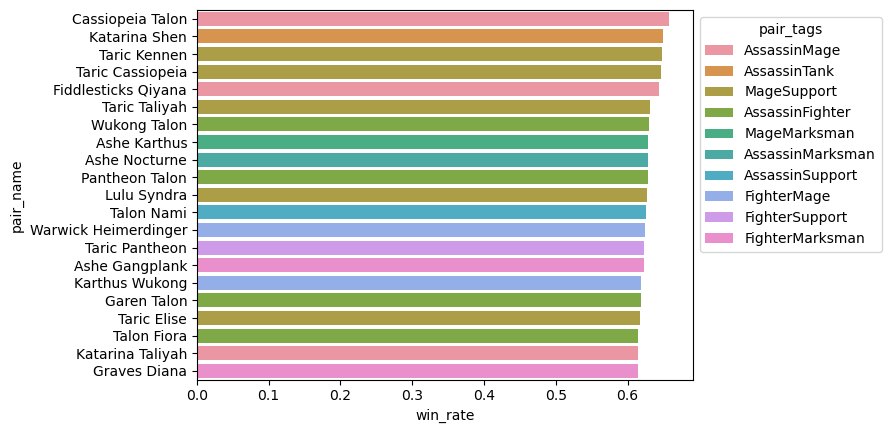

In [183]:
sns.set_palette(sns.color_palette("Set2"))
pairs_top20_plt = sns.barplot(data = pairs_winrate_top20, y = 'pair_name', x = 'win_rate', hue = 'pair_tags', dodge = False)
sns.move_legend(pairs_top20_plt, "upper left", bbox_to_anchor=(1, 1))

In [184]:
pairs_winrate_bot20 = pairs_winrate_cleaned.sort_values('win_rate', ascending = True).reset_index(drop = True).loc[0:20]
pairs_winrate_bot20

,pair_name,pair_tags,win_rate,games
0,Nunu & Willump Garen,FighterTank,0.306306,111.0
1,Sejuani Ornn,TankTank,0.316239,117.0
2,Nunu & Willump Yuumi,SupportTank,0.327103,107.0
3,Morgana Orianna,MageMage,0.333333,102.0
4,Nunu & Willump Yasuo,FighterTank,0.336538,104.0
5,Zilean Mordekaiser,FighterSupport,0.346939,147.0
6,Orianna Ornn,MageTank,0.352459,122.0
7,Rammus Kai'Sa,MarksmanTank,0.355140,107.0
8,Orianna Yuumi,MageSupport,0.355769,104.0
9,LeBlanc Akali,AssassinAssassin,0.363636,110.0


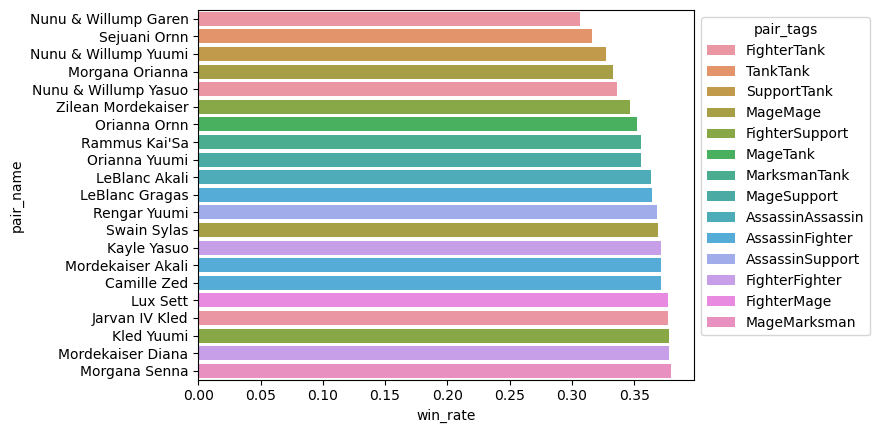

In [186]:
pairs_bot20_plt = sns.barplot(data = pairs_winrate_bot20, y = 'pair_name', x = 'win_rate', hue = 'pair_tags', dodge = False)
sns.move_legend(pairs_bot20_plt, "upper left", bbox_to_anchor=(1, 1))

In [187]:
pairs_winrate.to_csv("./archive/pairs_winrate.csv", index = False)

### 7. Hero and Class Win Rate by Patch Versions
The patch affects the heros significantly. To show the trend of each class's win rates over versions, I will plot them and show some sample heros of certain tags.

In [88]:
player_df = pd.read_sql(sql = 'SELECT championId, win, patch_version FROM classic_rank_players',
                               con = sql_engine)
champion_df = pd.read_sql(sql = 'SELECT c.key as championId, c.name, tags FROM champion c',
                         con = sql_engine)
champion_df['tags'] = [tag.split("'")[1] for tag in champion_df['tags']]

In [89]:
player_df["patch_version"] = player_df["patch_version"].apply(lambda x: float(x))

In [90]:
player_df = pd.merge(player_df, champion_df, on = 'championId', how = 'inner').sort_values(by = 'patch_version').reset_index(drop = True)
player_df

,championId,win,patch_version,name,tags
0,164,0,8.1,Camille,Fighter
1,81,1,8.1,Ezreal,Marksman
2,69,1,8.1,Cassiopeia,Mage
3,5,1,8.1,Xin Zhao,Fighter
4,43,1,8.1,Karma,Mage
...,...,...,...,...,...
824895,24,1,10.6,Jax,Fighter
824896,24,0,10.6,Jax,Fighter
824897,24,0,10.6,Jax,Fighter
824898,24,1,10.6,Jax,Fighter


In [102]:
class_winrate = player_df.groupby(['tags', 'patch_version']).apply(lambda x: pd.Series({'win_rate': sum(x['win'])/len(x),
                                                                                       'wins': sum(x['win']),
                                                                                       'total': len(x)}))
class_winrate

win_rate     wins    total
tags     patch_version                            
Assassin 8.11           0.333333      1.0      3.0
         8.13           0.666667      2.0      3.0
         8.15           0.666667      4.0      6.0
         8.16           0.380952      8.0     21.0
         8.17           0.300000      3.0     10.0
...                          ...      ...      ...
Tank     10.20          0.485952   2508.0   5161.0
         10.30          0.495718   4747.0   9576.0
         10.40          0.496574   7465.0  15033.0
         10.50          0.491878  11537.0  23455.0
         10.60          0.487784  10042.0  20587.0

[253 rows x 3 columns]

Some patches are with small samples. I will drop the patches with less than 1000 samples in any class.

In [103]:
class_winrate = class_winrate.reset_index()

In [122]:
patch_version_set = list(set([class_winrate.loc[i, 'patch_version'] for i in range(len(class_winrate)) if class_winrate.loc[i, 'total'] < 1000]))
patch_version_set

[9.22,
 8.9,
 9.14,
 8.11,
 8.13,
 8.15,
 8.17,
 8.16,
 8.18,
 8.19,
 8.2,
 9.1,
 8.1,
 9.4,
 9.9,
 8.21,
 8.22,
 8.23,
 8.8,
 8.24,
 9.11,
 9.12,
 9.13,
 9.15,
 9.16,
 9.17,
 9.18,
 9.19,
 9.2,
 9.21,
 9.6,
 9.3,
 9.8,
 9.5,
 9.7]

In [125]:
filtered_class_winrate = class_winrate[~class_winrate['patch_version'].isin(patch_version_set)]
filtered_class_winrate

,tags,patch_version,win_rate,wins,total
27,Assassin,9.23,0.486416,931.0,1914.0
28,Assassin,9.24,0.500802,2186.0,4365.0
36,Assassin,10.10,0.511023,3361.0,6577.0
37,Assassin,10.20,0.504793,3370.0,6676.0
38,Assassin,10.30,0.507972,4715.0,9282.0
39,Assassin,10.40,0.515412,6889.0,13366.0
40,Assassin,10.50,0.509897,11824.0,23189.0
41,Assassin,10.60,0.511808,10793.0,21088.0
70,Fighter,9.23,0.503789,2061.0,4091.0
71,Fighter,9.24,0.498498,4812.0,9653.0


As the Riot Games (the producer of League of Legends) update new big patch versions (9.xx to 10.xx) every January. Patch `10.10` should be the starting version of 2020 but there is a asynchronous updating between the korean server and the NA server. Therefore, late versions of games (9.23 and 9.24) are counted into our analysis as well. Also, because of the 'seasons', the game clears the gamers' ranking divisions and requires new matchings to climb divisions in the new seasons. During the very early versions of the season, there is few data as this dataset collects `Challenger`, `GrandMaster`, and `Master` matches only. To make the analysis based on sufficient data size, I use the data of patch versions from `9.23` to `10.6`.

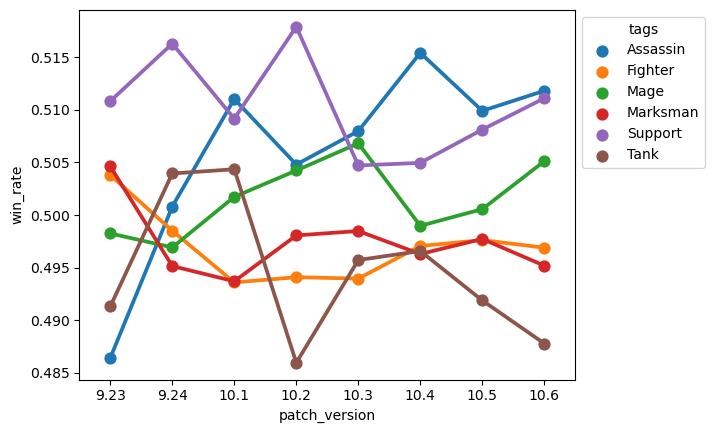

In [133]:
class_version_plt = sns.pointplot(data = filtered_class_winrate, x = 'patch_version', y = 'win_rate', hue = 'tags')
sns.move_legend(class_version_plt, "upper left", bbox_to_anchor = (1,1))

The most obvious trend is that `Assassin`'s win rate kept going up as the version was updated while `Marksman` and `Fighter` kept going down. The `Tank` is lowest from `10.2` version. This plot aligns with the findings in the win rates of single heros across all versions. `Assassin`, `Mage`, and `Support` are significant in games.
As the `Assassin` and `Mage` got stronger, the `Marksman` became more vulnerable in battles and could be easily killed. 

In [135]:
player_winrate_byclass = player_df.groupby(['name', 'tags']).apply(lambda x: pd.Series({'win_rate': sum(x['win'])/len(x)})).reset_index()
idx = player_winrate_byclass.groupby(['tags'])['win_rate'].transform(max) == player_winrate_byclass['win_rate']

player_winrate_top1byclass = player_winrate_byclass[idx]

In [136]:
player_winrate_top1byclass # the top 1 winrate champion in each class

,name,tags,win_rate
11,Bard,Support,0.551180
51,Karthus,Mage,0.545202
58,Kindred,Marksman,0.517156
104,Singed,Tank,0.521739
115,Talon,Assassin,0.545275
135,Wukong,Fighter,0.536505


In [137]:
top1champions = list(player_winrate_top1byclass['name'])
top1champions

['Bard', 'Karthus', 'Kindred', 'Singed', 'Talon', 'Wukong']

In [139]:
top1champion_winrate_byversion = player_df[player_df['name'].isin(top1champions) & (~player_df['patch_version'].isin(patch_version_set))]
top1champion_winrate_byversion = top1champion_winrate_byversion.groupby(['name', 'tags', 'patch_version'])
top1champion_winrate_byversion = top1champion_winrate_byversion.apply(lambda x: pd.Series({'win_rate': sum(x['win'])/len(x)})).reset_index()


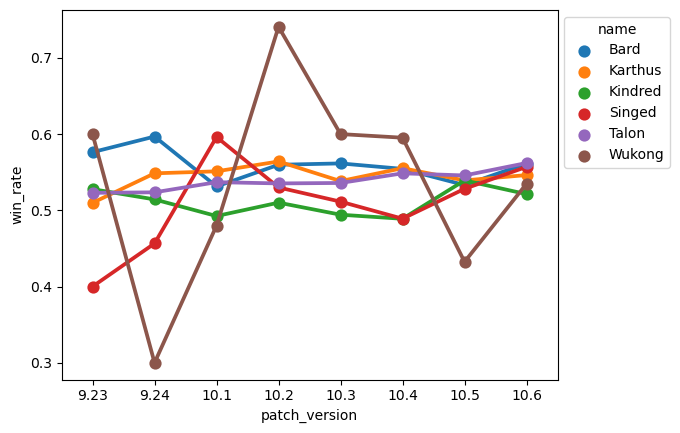

In [141]:
top1champion_plt = sns.pointplot(data = top1champion_winrate_byversion, x = 'patch_version', y = 'win_rate', hue = 'name')
sns.move_legend(top1champion_plt, "upper left", bbox_to_anchor = (1,1))

All top1 champions had higher win rates than `Kindred` who is `Marksman`. `Wukong` is a fighter with volatile win rates. It may be because of the nerfing and buffing in some versions in 2020 but the entire `Fighter` class did not perform well in 2020. `Talon`, `Karthus`, and `Bard` have consistent trendings of win rates as the previous plot shows.